For the Final Project, I will be using two datasets regarding COVID-19. I will answer three hypothesis/questions using these two datasets. Intially, I will be doing some exploratory data analysis to see how both of the datasets look before answering the questions/hypothesis. The first dataset is about the outbreak of COVID-19 in the United States. 
The first dataset was collected from : http://covidtracking.com/api/states/daily.csv. The dataset has  rows and 27 columns. The data is 901.5 KB. The data provides us with the information as virus progresses through out the United States.  The data consists of the following information:

date                        
state                      
positive                    
negative                    
pending                     
hospitalizedCurrently       
hospitalizedCumulative      
inIcuCurrently              
inIcuCumulative             
onVentilatorCurrently       
onVentilatorCumulative      
recovered                   
dataQualityGrade            
lastUpdateEt                
hash                        
dateChecked                 
death                      
hospitalized                
total                       
totalTestResults            
posNeg                      
fips                        
deathIncrease               
hospitalizedIncrease        
negativeIncrease            
positiveIncrease            
totalTestResultsIncrease    

The second the dataset was collected from:  https://covid.ourworldindata.org/data/ecdc/full_data.csv.
The data provides us with the spread of the virus through out world. The dataset contains 6 columns and 18,554 rows. I used the following 6 columns to do my analysis:  

date            
location        
new_cases       
new_deaths    
total_cases     
total_deaths    


Hypothesis 1: Corona virus grew much faster in the NY than the country of Italy. 
Hypothesis 2: The state of NY has longer increasing rate of new cases than Italy. 
Hypothesis 3: Time frame is a very good indicator of the number of cases and death toll. 


In [22]:

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt #import libraries 

In [23]:

url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content #define URL and get content 

In [24]:
df = pd.read_csv(io.StringIO(s.decode('utf-8'))) #read in pandas dataframe 

In [25]:
df.shape #columns & rows 

(4329, 27)

In [27]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d') #format date column

In [28]:
df.drop(['dateChecked'],axis=1,inplace=True) #drop unnecessary dates 

In [29]:

df['state']=df['state'].apply(str) #convert the state data to string 

In [30]:
df.info() #checking general information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 26 columns):
date                        4329 non-null datetime64[ns]
state                       4329 non-null object
positive                    4314 non-null float64
negative                    4132 non-null float64
pending                     774 non-null float64
hospitalizedCurrently       1959 non-null float64
hospitalizedCumulative      1830 non-null float64
inIcuCurrently              1026 non-null float64
inIcuCumulative             422 non-null float64
onVentilatorCurrently       839 non-null float64
onVentilatorCumulative      142 non-null float64
recovered                   1786 non-null float64
dataQualityGrade            3215 non-null object
lastUpdateEt                3974 non-null object
hash                        4329 non-null object
death                       3603 non-null float64
hospitalized                1830 non-null float64
total                       4329 non-null in

In [31]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-05-21,AK,402.0,39143.0,NaN,19.0,NaN,NaN,NaN,NaN,...,NaN,39545,39545,39545,2,0.0,0.0,2500.0,0.0,2500.0
1,2020-05-21,AL,13119.0,157620.0,NaN,NaN,1528.0,NaN,526.0,NaN,...,1528.0,170739,170739,170739,1,12.0,35.0,5914.0,375.0,6289.0
2,2020-05-21,AR,5458.0,93818.0,NaN,78.0,535.0,NaN,NaN,14.0,...,535.0,99276,99276,99276,5,3.0,0.0,2563.0,455.0,3018.0
3,2020-05-21,AS,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,124,124,124,60,0.0,0.0,0.0,0.0,0.0
4,2020-05-21,AZ,15315.0,156312.0,NaN,812.0,1830.0,299.0,NaN,197.0,...,1830.0,171627,171627,171627,4,16.0,38.0,5774.0,418.0,6192.0


In [32]:
df.fillna(value=-1, inplace=True) #replacing NAN by -1

In [55]:
def plot_one(var='positiveIncrease', #function to plot one variable of a given state 
             state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected String"
    assert type(state)==str, "Expected String"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

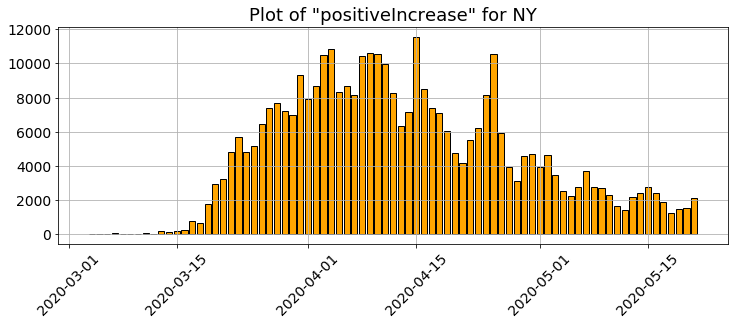

In [56]:
plot_one()

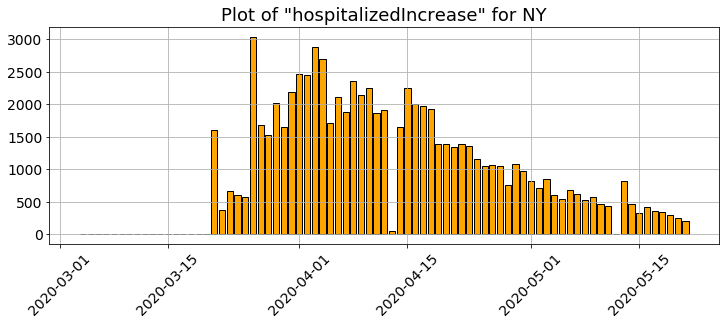

In [57]:
plot_one('hospitalizedIncrease','NY')

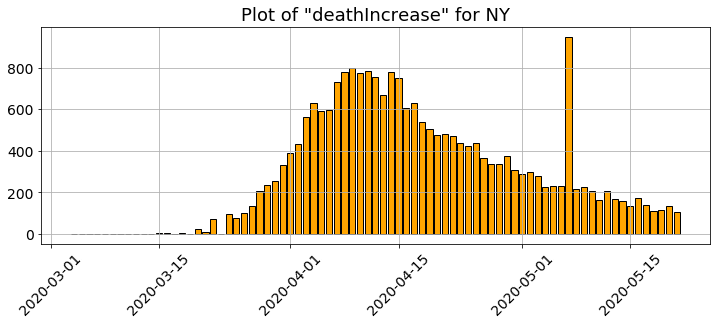

In [58]:
plot_one('deathIncrease','NY')

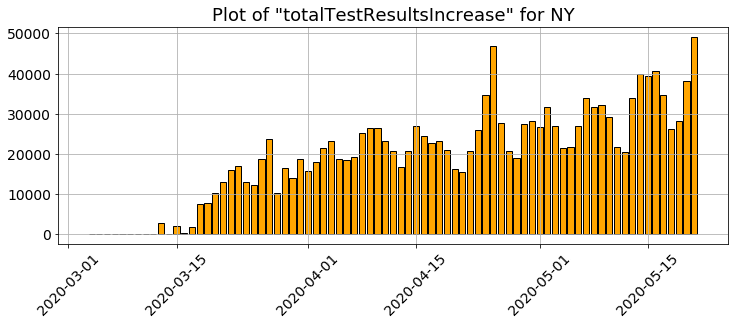

In [59]:
plot_one('totalTestResultsIncrease','NY')

In [60]:

def plot_two(varx='totalTestResultsIncrease', #function to plot two variable of a given state 
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

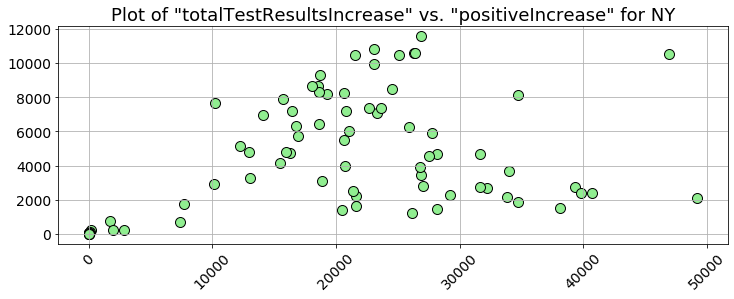

In [61]:
plot_two()

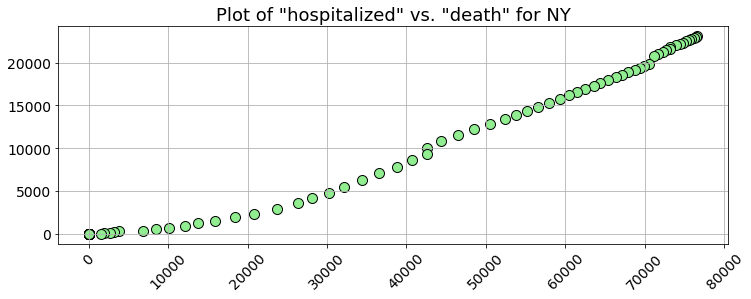

In [62]:

plot_two('hospitalized','death','NY')

In [63]:
def fatality_ratio(state='NY'): #Function to calculate fatality ratio 
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

In [64]:

def plotTesting(lst_states=['NY','CA','MA','MD','PA']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

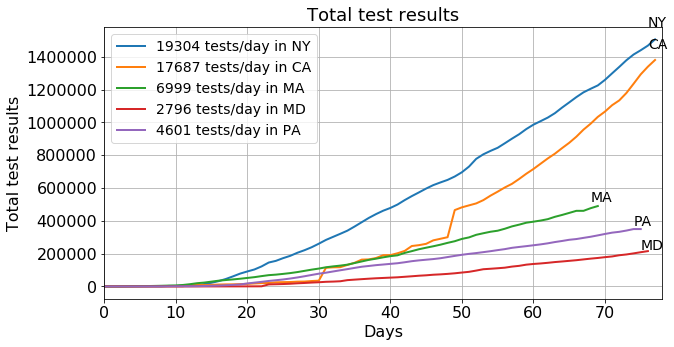

In [41]:
plotTesting()

In [65]:

def recovery_ratio(state='NY'): #Fuction to calculate recovery ratio 
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

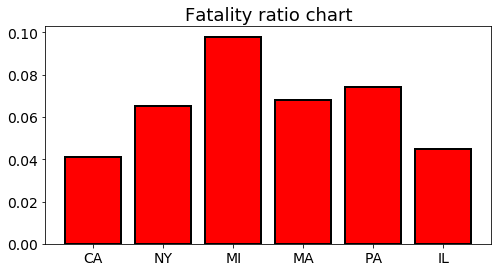

In [66]:

states = ['CA','NY','MI','MA','PA','IL']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)
plt.show()

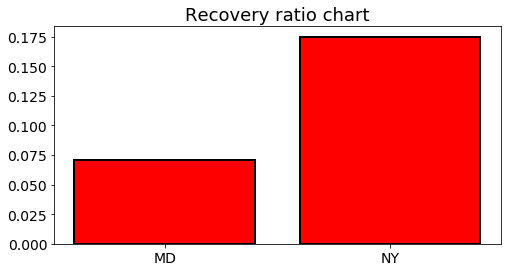

In [36]:

states = ['MD','NY']
fr,x = [],[]
for s in states:
    data = recovery_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Recovery ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)
plt.show()

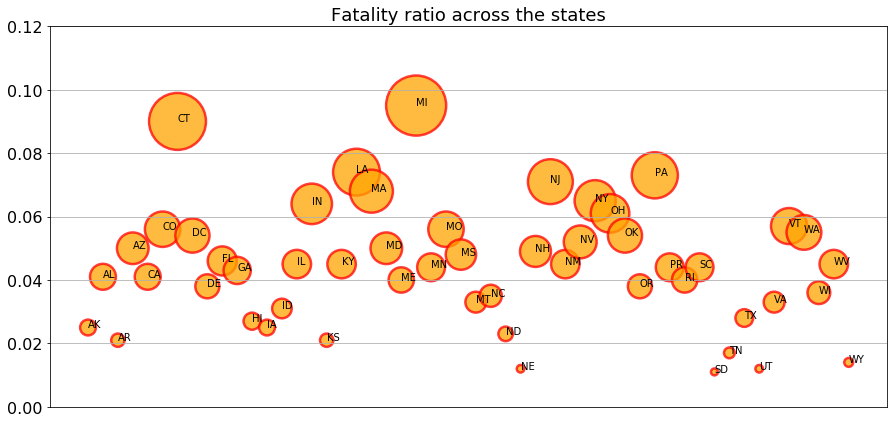

In [39]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)
fr = np.array(fr)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Fatality ratio across the states",fontsize=18)
plt.scatter(x=x,y=fr,
            s=4e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)
#plt.xticks(rotation=45,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))
plt.ylim(0,0.12)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

In [41]:
url="https://covid.ourworldindata.org/data/ecdc/full_data.csv"
s=requests.get(url).content #define URL and get content 

In [42]:
df2 = pd.read_csv(io.StringIO(s.decode('utf-8'))) #read in pandas dataframe 

In [43]:
df2.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [44]:
df2.shape #columns & rows 

(18765, 6)

In [45]:
df2.info() #checking general information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18765 entries, 0 to 18764
Data columns (total 6 columns):
date            18765 non-null object
location        18765 non-null object
new_cases       18765 non-null int64
new_deaths      18765 non-null int64
total_cases     18765 non-null int64
total_deaths    18765 non-null int64
dtypes: int64(4), object(2)
memory usage: 879.7+ KB


In [46]:
df2.fillna(value=-1, inplace=True) #replacing NAN by -1

In [47]:
df2['date'] =  pd.to_datetime(df2['date'], format='%Y-%m-%d') #format date column

In [48]:
df2['location']=df2['location'].apply(str) #convert the location column data to string 

In [49]:
def plot_var(var='new_cases', #function to plot one variable of a given state 
             location='Italy'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(location)==str, "Expected string as the state name"
 
    y = df2[df2['location']==location][var]
    x = df2[df2['location']==location]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,location),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

C:\Users\nasir\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


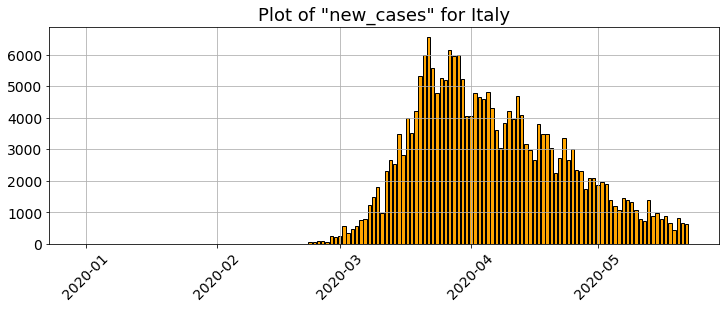

In [13]:
plot_var()

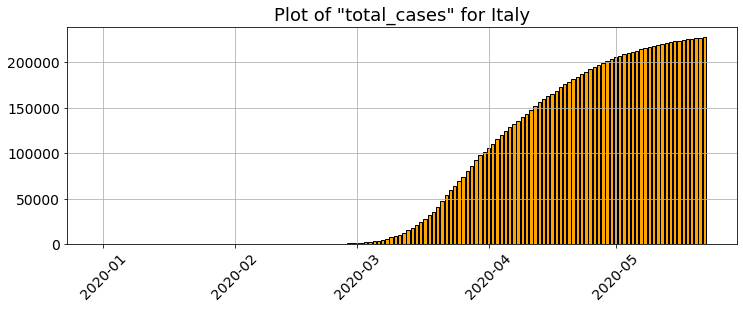

In [50]:
plot_var('total_cases','Italy')

In [51]:

def plot_xy(varx='new_cases', #function to plot two variable of a given state 
            vary='total_cases',
            location='Italy'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df2[df2['location']==location][vary]
    x = df2[df2['location']==location][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,location),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

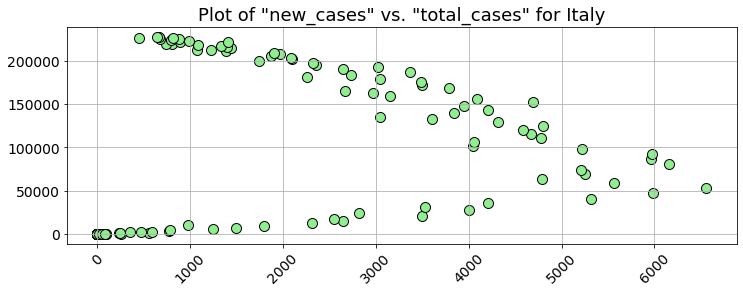

In [52]:
plot_xy()

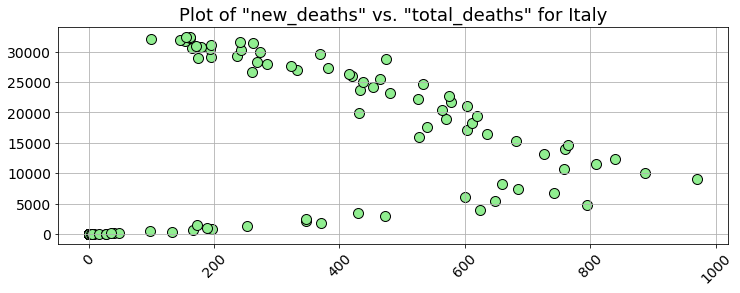

In [53]:
plot_xy('new_deaths','total_deaths','Italy')

In [ ]:
Conclusion:
The analysis support my hypothesis 1 that Italy has higher fatality rate than the state of NY. 
The analysis also support my hypothesis 2 that NY has longer increasing rate of new cases than the Italy. 
This might have been because Italy imposed more strict quarantine than the state of NY and for a prolonged time period. 
My 3rd assumption was that timeframe is really important in determining new cases and total deaths. As we can see from the
charts,timeframe plays important role in dictating death tolls and the number of cases. In Italy, timeframe decreased new 
cases but death rate increased because people who were infected either recovering or dying. 